### Harmonic mean convergence testing 

|Parameters| values|
|----------|-------|
|q | 500|
|D | 300|
|$\tau$| 35|
|$R_0$ | 0.2|
|$\kappa$ | 0.1|
|m | 3|
|$b_0$ | 0.001|

Number of iterations = 20,000

In [1]:
# allow imports from the LM package
import os
import sys
sys.path.append(os.path.abspath('..'))
import numpy as np 
import matplotlib.pyplot as plt 
from inference.attractant_inference import AttractantInferer, observed_bias
from in_silico.sources import CellsOnWoundMargin, PointWound, CellsInsideWound
from Utilities.distributions import Normal

In [2]:
Prod_time = np.load('../data/Synthetic_Data/Synth_attract_prod_time.npy', allow_pickle=True)
Constant_conc  = np.load('../data/Synthetic_Data/Synth_attract_constant_conc.npy', allow_pickle=True)


constant_conc_params = Constant_conc[0].get_chain(flat = True, discard = 500)
prod_time_params = Prod_time[0].get_chain(flat = True, discard = 500)


np.mean(constant_conc_params[0]),np.mean(constant_conc_params[1])


(26.108602350325256, 19.070430909827078)

In [3]:
def HME(sampler):
    log_probs = sampler.get_log_prob(flat = True, discard = 1000)
    probs = np.exp(log_probs)
    HME = 1 / np.mean(1/probs)
    return HME

HME1 = HME(Prod_time[0])
HME2 = HME(Constant_conc[0])


HME1/HME2

84766.45285616901

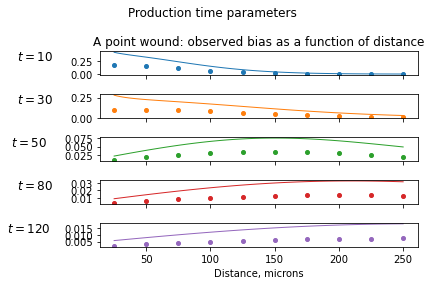

In [17]:

q = np.mean(prod_time_params[:, 0])
D = np.mean(prod_time_params[:, 1])
tau = np.mean(prod_time_params[:, 2])
R0 = np.mean(prod_time_params[:, 3])
kappa = np.mean(prod_time_params[:, 4])
m = np.mean(prod_time_params[:, 5])
b0 = np.mean(prod_time_params[:, 6])
params = np.array([q, D,tau, R0, kappa, m, b0])
params_1 = np.array([500, 300, 35, 0.2, 0.1, 3, 0.001])

attractant_means = []
attractant_stds = []

for i in range(6):
    attractant_means.append(np.mean(prod_time_params[:, i]))
    attractant_stds.append(np.std(prod_time_params[:, i]))


fig, axes = plt.subplots(ncols=1, nrows=5, sharex=True)
plt.suptitle("Production time parameters")

   
# instantiate a point wound
wound = PointWound(position=np.array([0, 0]))

# where to measure observed bias
r_points = np.array([25, 50, 75, 100, 125, 150, 175, 200, 225, 250])#, 175, 200, 225, 250
r = np.linspace(25, 250, 100)
t = np.array([10, 30, 50, 80, 120])

for ax, p in zip(axes, t):
    ax.set_ylabel('$t={}$'.format(p), rotation=0, size='large', labelpad=35)

# plot the points 
lines = []
scatters = []
for i, tt in enumerate(t):
    col = plt.rcParams['axes.prop_cycle'].by_key()['color'][i]
    lines.append(axes[i].plot(r, observed_bias(params, r, tt, wound), color=col, linewidth=1)[0])
    scatters.append(axes[i].plot(r_points, observed_bias(params_1, r_points, tt, wound), color=col, marker='o', linewidth=0, markersize=4)[0])
    #axes[i].set_ylim(0, 0.3)

axes[0].set_title('A point wound: observed bias as a function of distance')
axes[-1].set_xlabel('Distance, microns')
plt.tight_layout()

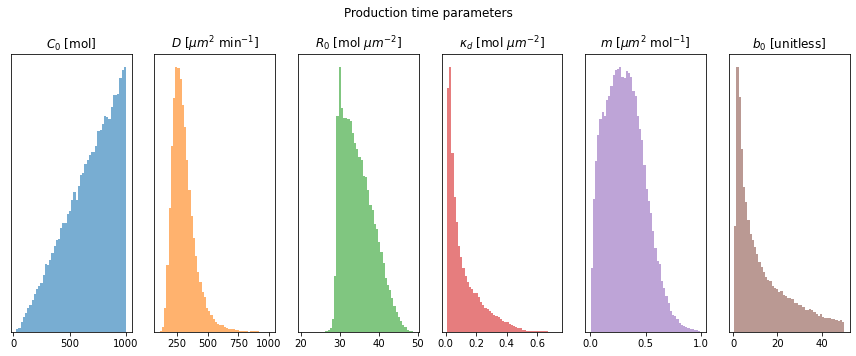

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(12, 5), sharex='col')
cols = plt.rcParams['axes.prop_cycle'].by_key()['color']

names = ['$C_0$ [mol]', '$D$ [$\mu m^{2}$ min$^{-1}$]', '$R_0$ [mol $\mu m^{-2}$]', '$\kappa_d$ [mol $\mu m^{-2}$]', '$m$ [$\mu m^{2}$ mol$^{-1}$]', '$b_0$ [unitless]']
plt.suptitle("Production time parameters")
for j in range(6):
    
        axes[j].set_title(names[j])
        axes[j].set_yticks([])
        axes[j].hist(prod_time_params[:, j], bins=50, color=cols[j], alpha=0.6, density=True)
        #inferer_delta.priors[j].plot(ax=axes[j], color=cols[j])
        
plt.tight_layout()

In [6]:
np.mean(constant_conc_params[:, 0])

11.638054006033201

<ipython-input-18-6995f4d92a66>:48: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


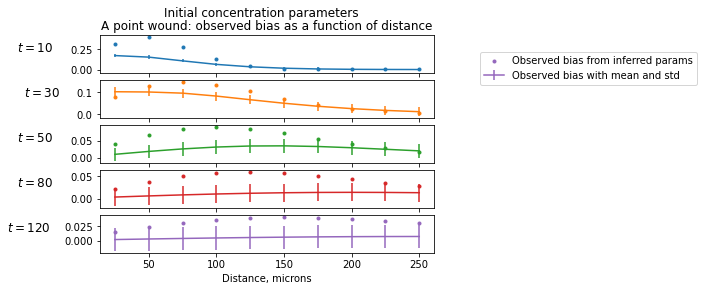

In [18]:
constant_conc_params = Constant_conc[0].get_chain(flat = True, discard = 500)

q = np.mean(constant_conc_params[:, 0])
D = np.mean(constant_conc_params[:, 1])
tau = 35
R0 = np.mean(constant_conc_params[:, 2])
kappa = np.mean(constant_conc_params[:, 3])
m = np.mean(constant_conc_params[:, 4])
b0 = np.mean(constant_conc_params[:, 5])
params = np.array([q, D, R0, kappa, m, b0])
params_1 = np.array([500, 300, tau, 0.2, 0.1, 3, 0.001])

attractant_means = []
attractant_stds = []

for i in range(6):
    attractant_means.append(np.mean(constant_conc_params[:, i]))
    attractant_stds.append(np.std(constant_conc_params[:, i]))


fig, axes = plt.subplots(ncols=1, nrows=5, sharex=True)
plt.suptitle("Initial concentration parameters")


# instantiate a point wound
wound = PointWound(position=np.array([0, 0]))
yerr = 0.02
# where to measure observed bias
r_points = np.array([25, 50, 75, 100, 125, 150, 175, 200, 225, 250])#, 175, 200, 225, 250
r = np.linspace(25, 250, 100)
t = np.array([10, 30, 50, 80, 120])

for ax, p in zip(axes, t):
    ax.set_ylabel('$t={}$'.format(p), rotation=0, size='large', labelpad=35)

# plot the points 
lines = []
scatters = []
for i, tt in enumerate(t):
    col = plt.rcParams['axes.prop_cycle'].by_key()['color'][i]
    axes[i].scatter(r_points, observed_bias(params, r_points, tt, wound), color=col, marker='.', label = "Observed bias from inferred params")
    axes[i].errorbar(r_points, observed_bias(params_1, r_points, tt, wound), yerr = yerr, color=col, label = "Observed bias with mean and std")
    #axes[i].set_ylim(0, 0.5)

axes[0].set_title('A point wound: observed bias as a function of distance')
axes[-1].set_xlabel('Distance, microns')
plt.legend(bbox_to_anchor=(0., 5,1.8, .5))
plt.tight_layout()
plt.savefig("../data/Synthetic_Data/synthetic_data_ob.pdf",bbox_inches = 'tight')

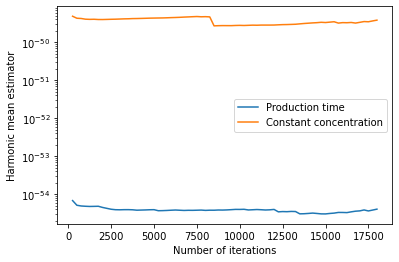

In [19]:
def HME_1(sampler,discards):
    log_probs = sampler.get_log_prob(flat = True, discard = discards)
    probs = np.exp(log_probs)
    HME = np.mean(1/probs)
    return HME

discards = np.arange(250,18250,250)
hme_1 = []
hme_2 = []
for discard in discards:
    hme_1.append(HME_1(Prod_time[0],discard))
    hme_2.append(HME_1(Constant_conc[0],discard))
    
plt.plot(discards,hme_1, label = "Production time")
plt.plot(discards,hme_2, label = "Constant concentration")
plt.xlabel("Number of iterations")
plt.ylabel("Harmonic mean estimator")
plt.yscale("log")
plt.legend()






Text(0, 0.5, 'Convergence')

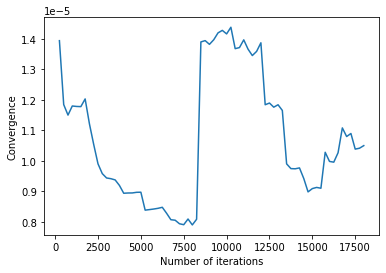

In [15]:
ratio = [hme_1[i]/hme_2[i] for i in range(len(hme_1))]
plt.plot(discards, ratio)
plt.xlabel("Number of iterations")
plt.ylabel("Convergence")